In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 

In [2]:
L = 10
p = 0.8

In [3]:
def get_neighbours(matrix, x, y):
    new_array = np.zeros(shape=(len(matrix)+2, len(matrix)+2), dtype=int)
    new_array[1:-1, 1:-1] = matrix  
    
    neighbours = []
    standard_neighbours = ((-1,-1), (-1,0), (-1,1), (0,-1), (0, 1), (1,-1), (1,0), (1,1))
    for dx, dy in standard_neighbours:
        neighbours.append(new_array[x+1+dx][y+1+dy])
    
    return neighbours

In [4]:
def generate_forest(size, probability):
    matrix = np.random.rand(size*size)
    matrix = np.where(matrix>probability, 0, 1)
    matrix = np.reshape(matrix, (size, size))
    
    return matrix

In [5]:
def fire_simulation(matrix):
    states = [matrix]
    next_step = np.array(matrix, copy=True)
    while np.any(matrix[:, :] == 2):
        for i in range(L):
            for j in range(L):
                neighbours = get_neighbours(matrix, i, j)
                if matrix[i, j] == 2:
                    next_step[i, j] = 3
                elif 2 in neighbours and matrix[i, j] == 1:
                    next_step[i, j] = 2

        matrix = np.array(next_step, copy=True) 
        states.append(matrix)
        
    return states

In [6]:
matrix = generate_forest(L, p)

In [7]:
for i in range(3):
    matrix[len(matrix)-1, np.random.randint(0, len(matrix)-1)] = 2

In [8]:
states = fire_simulation(matrix)

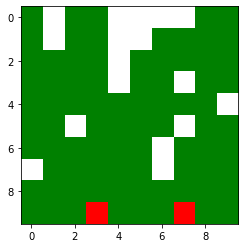

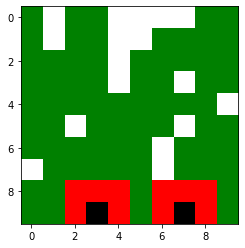

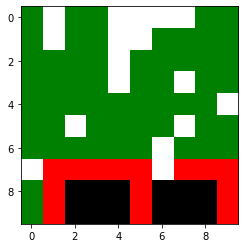

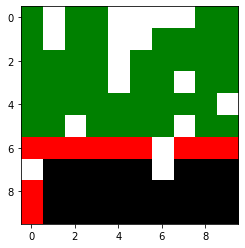

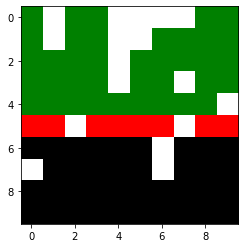

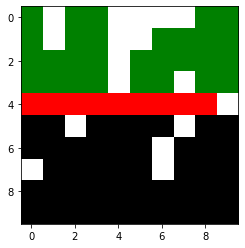

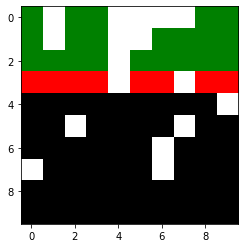

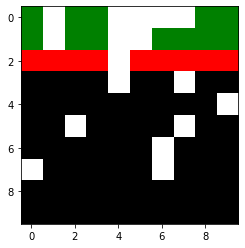

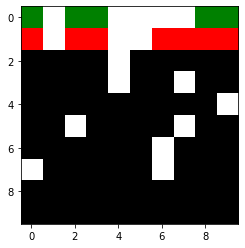

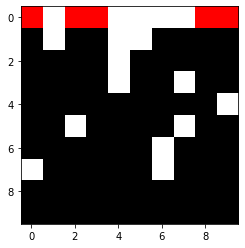

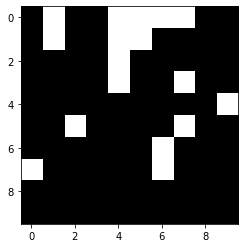

In [9]:
cmap = ListedColormap(['white', 'green', 'red', 'black'])
plt.imshow(states[0], interpolation="nearest", cmap=ListedColormap(['white', 'green', 'red']))
plt.show()
for i in range(len(states)-1):
    plt.imshow(states[i+1], interpolation="nearest", cmap=cmap)
    plt.show()